# Introduction to BioPython

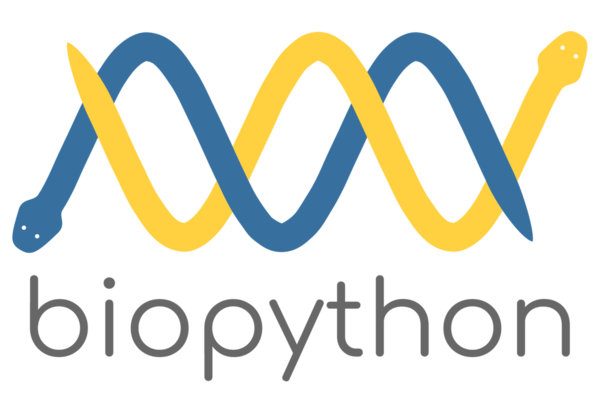

# Basics

Cheack the version

In [ ]:
import Bio
print(Bio.__version__)

# Sequences

In [ ]:
# read the sequence
from Bio.Seq import Seq
str_seq = "AAATTTGGGCCC"
print(type(str_seq))
my_seq = Seq(str_seq)
print(type(my_seq))
my_seq

In [ ]:
# Complement
comseq = my_seq.complement()
comseq

In [ ]:
# Reverse complement
comseq.reverse_complement()

In [ ]:
# Transcribe
mRNA = my_seq.transcribe()
mRNA

In [ ]:
# back_transcribe
seq = my_seq.back_transcribe()
seq

In [ ]:
# Translate
protein_seq = mRNA.translate()
protein_seq

In [ ]:
# Get Standard Codon table
from Bio.Data import CodonTable
print(Bio.Data.CodonTable.standard_dna_table)

# String Operations

In [ ]:
# Get substring
my_seq[0:4]

In [ ]:
# Concatination
my_seq[0:3]+ my_seq[-3:]

In [ ]:
# Find the position
my_seq.find('C')

In [ ]:
# compare
seq1 = Seq("ACGT")
seq2 = Seq("ACGT")
str(seq1) == str(seq2)

# Statistics

In [ ]:
# Return the 10 most frequent amino acids as List
from collections import Counter
common_amino = Counter(protein_seq)
common_amino.most_common(10)

In [ ]:
# Representation as bar chart
import matplotlib.pyplot as plt
del common_amino['*']  # Remove unwanted amino acid (if applicable)
plt.bar(common_amino.keys(), common_amino.values())
plt.title("Protein Sequence Frequency")
plt.xlabel("Amino Acids")
plt.ylabel("Frequency")
plt

In [ ]:
# Representation in tabular format
import pandas as pd
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]
large_proteins = [x for x in protein_list if len(x)>3]
df = pd.DataFrame({'protein_seq': large_proteins})
# Add a column with sequence lengths
df['length'] = df['protein_seq'].apply(len)
df

# Connect to NCBI Database and Download a fasta file

In [ ]:
from Bio import Entrez
# Initilize connection
Entrez.email = "sampleemail@gmail.com"
db = Entrez.einfo(db="nuccore") 

In [ ]:
# Function to write fasta file single id

def writeToFastasingleid(ID):
    file = open('MN908947_3.fasta', 'w')
    # for seq_id in IDList:
    handle = Entrez.efetch(db="nuccore", id=ID, rettype="fasta", retmode="text")
    record = handle.read()
    file.write(record.rstrip('\n'))

[Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome](https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta)

In [ ]:
# For the id get Fasta  and write to a file

NCBI_id ='MN908947.3'
writeToFastasingleid(NCBI_id)

# Reading from fasta file

In [ ]:
from Bio import SeqIO
seq_file_read = SeqIO.read("MN908947_3.fasta","fasta")
seqfromfile = seq_file_read.seq
seqfromfile

In [ ]:
from Bio import SeqIO
for record in SeqIO.parse("MN908947_3.fasta", "fasta"):
    print(record)

In [ ]:
len(seq_file_read.seq)

In [ ]:
from Bio.SeqUtils import molecular_weight
molecular_weight(seq_file_read.seq)

In [ ]:
seqfromfile[0:4]

In [ ]:
seqfromfile[0:3] + seqfromfile[-3:]

In [ ]:
seqfromfile.find('AGA')

In [ ]:
GC(seqfromfile)

In [ ]:
seqfromfile[:11]

In [ ]:
# Complement
seqfromfile[:4]

In [ ]:
#complement
comp_seq = seqfromfile[:4].complement()
comp_seq

In [ ]:
#reverse complement
comp_seq[:4].reverse_complement()

# Nucleotide frequency

In [ ]:
#count the nucleotides frequency in the DNA
DNA= seqfromfile
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

#create a dataframe
nts = pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts = nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts = nts.sort_values(by=['frequency'], ascending=True)

In [ ]:
nts.head(20)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x="nucleotides", y="frequency", data=nts, palette='Spectral')

# Transcription & Translation Studies

In [ ]:
#translation
protein_seq = seqfromfile.translate()
protein_seq

In [ ]:
#list the most common amino acids
common_amino = Counter(protein_seq)
common_amino.most_common(10)

In [ ]:
#delete stop codon
del common_amino['*']

#visualize all 20 amino acid occurrences in the form of a histogram
plt.bar(common_amino.keys(), common_amino.values())
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')

In [ ]:
#split sequence at stop codon (*)
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list

In [ ]:
#convert sequences to dataframe with len > 10
large_proteins = [x for x in protein_list if len(x)>10]
df = pd.DataFrame({'protein_seq':large_proteins})
df

In [ ]:
#add a column with sequence lengths
df['length'] = df['protein_seq'].apply(len)
df.head()

In [ ]:
#sort sequence data
df.sort_values(by=['length'], ascending=False)

In [ ]:
#take a single protein from the table
one_large_protein = df.nlargest(1, 'length')
single_protein = one_large_protein.iloc[0, 0]
single_protein

In [ ]:
#write to a file
with open('single_protein.fasta', 'w') as file:
    file.write('>large protein \n' + single_protein)

# Basic Local Alignment Using NCBI-BLAST

In [ ]:
%%time


from Bio import SeqIO, SearchIO
from Bio.Blast import NCBIWWW
read = SeqIO.read('single_protein.fasta', 'fasta')
result_handle = NCBIWWW.qblast('blastp', 'pdb', read.seq)
blast_qresult = SearchIO.read(result_handle, 'blast-xml')

In [ ]:
blast_qresult

In [ ]:
#blast result
print(blast_qresult[0:5])

In [ ]:
#fetch the id, description, evalue, bitscore & alignment of second hit for SARS-CoV-2
seqid = blast_qresult[1]

details = seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

In [ ]:
#alignment detail
print(f"alignment:\n{details.aln}")

In [ ]:
from Bio.PDB import PDBParser
#read pdb file
parser = PDBParser()
structure = parser.get_structure('6YYT', '6YYT.pdb')
for chain in structure[0]:
    print(f'chain ID: {chain.id}')

# Visualizing SARS-CoV-19 Protein structure

Using nglView

In [ ]:
import nglview as nv 
view = nv.show_biopython(structure)
view

## Using py3Dmol

In [ ]:
#identify number of chains
from Bio.PDB import *
#And we set up a parser for our PDB
parser = PDBParser()
io=PDBIO()
for chain in structure.get_chains():
    io.set_structure(chain)
    io.save("6YYT_" + chain.get_id() + ".pdb")

In [ ]:
import py3Dmol
#First we assign the py3Dmol.view as view
view=py3Dmol.view()
#The following lines are used to add the addModel class
#to read the PDB files of chain B and C
view.addModel(open('6YYT_A.pdb', 'r').read(),'pdb')
view.addModel(open('6YYT_B.pdb', 'r').read(),'pdb')
view.addModel(open('6YYT_C.pdb', 'r').read(),'pdb')
view.addModel(open('6YYT_D.pdb', 'r').read(),'pdb')
view.addModel(open('6YYT_P.pdb', 'r').read(),'pdb')
view.addModel(open('6YYT_Q.pdb', 'r').read(),'pdb')
view.addModel(open('6YYT_T.pdb', 'r').read(),'pdb')
view.addModel(open('6YYT_U.pdb', 'r').read(),'pdb')
#Zooming into all visualized structures 
view.zoomTo()
#Here we set the background color as white
view.setBackgroundColor('white')
#Here we set the visualization style for chain B and C
view.setStyle({'chain':'A'},{'cartoon': {'color':'purple'}})
view.setStyle({'chain':'B'},{'cartoon': {'color':'yellow'}})
view.setStyle({'chain':'C'},{'cartoon': {'color':'orange'}})
view.setStyle({'chain':'D'},{'cartoon': {'color':'green'}})
view.setStyle({'chain':'P'},{'cartoon': {'color':'blue'}})
view.setStyle({'chain':'Q'},{'cartoon': {'color':'black'}})
view.setStyle({'chain':'T'},{'cartoon': {'color':'grey'}})
view.setStyle({'chain':'U'},{'cartoon': {'color':'pink'}})
#And we finally visualize the structures using the command below
view.show()

# Genome diagram

In [ ]:
handle = Entrez.efetch(db="nucleotide", id=NCBI_id, retmode="text", rettype="gb")

In [ ]:
genbank_record = SeqIO.read(handle, "genbank")
genbank_record

In [ ]:
[x for x in genbank_record.annotations]

In [ ]:
interested_keys = [
    'molecule_type',
    'topology',
    'sequence_version',
    'keywords',
    'source',
    'organism',
    'taxonomy',
]

In [ ]:
{x: genbank_record.annotations[x] for x in genbank_record.annotations if x in interested_keys}

In [ ]:
{feature.type for feature in genbank_record.features}

In [ ]:
CDSs = [feature for feature in genbank_record.features if feature.type == "CDS"]
[x.qualifiers["gene"] for x in CDSs if 'gene' in x.qualifiers]

In [ ]:
protein_seq = Seq(CDSs[0].qualifiers["translation"][0])

In [ ]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
gd_diagram = GenomeDiagram.Diagram(genbank_record.annotations['organism'])
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

In [ ]:
for feature in genbank_record.features:
    if feature.type != "gene":
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.violet
    gd_feature_set.add_feature(feature, color=color, label=True, label_size=15, label_angle=0, sigil='ARROW')

In [ ]:
gd_diagram.draw(format="linear", 
                orientation="landscape", 
                pagesize='A2', 
                fragments=4, 
                start=0, 
                end=len(genbank_record))
gd_diagram.write("linear.png", "png")

In [ ]:
from IPython.core.display import Image
Image("linear.png", retina=True)

# Mutation rate

In [ ]:
# Read the downloaded file
covid19_nepal = f = open("covid19_nepal", "r").read()
covid19_india = f = open("covid19_india", "r").read()
covid19_china = f = open("covid19_china", "r").read()
covid19_usa = f = open("covid19_usa", "r").read()
covid19_italy = f = open("covid19_italy", "r").read()

In [ ]:
import pandas as pd
# remove white spaces
for s in ' \n1234567890':
    covid19_nepal=covid19_nepal.replace(s,'')
    covid19_india=covid19_india.replace(s,'')
    covid19_china=covid19_china.replace(s,'')
    covid19_usa=covid19_usa.replace(s,'')
    covid19_italy=covid19_italy.replace(s,'')

# Show read data statistics
countries = ['Nepal','India','China',"USA","Italy"]
df = pd.DataFrame({'countries': countries})
length = [len(covid19_nepal),len(covid19_india),len(covid19_china),len(covid19_usa),len(covid19_italy)]
df['length'] = length
df

In [ ]:
import itertools
import numpy
# Find the number of posible permutations between 5 countries
perm_regions_names=list(itertools.permutations(['covid19_nepal','covid19_india','covid19_china',"covid19_usa","covid19_italy"],2))
perm_regions_names=numpy.array([*perm_regions_names]).tolist()
perm_regions=list(itertools.permutations([covid19_nepal, covid19_india, covid19_china, covid19_usa, covid19_italy],2))

In [ ]:
from Bio.Align import PairwiseAligner
def pairwisealignment(genome1, genome2):
    pa=PairwiseAligner()
    pairwise_score=pa.score(genome1, genome2)
    return pairwise_score,(len(genome1)+len(genome2))/2

In [ ]:
from tabulate import tabulate
match = []
missmatch = []
for i in range(0,len(perm_regions)):
    a=perm_regions[i][0]
    b=perm_regions[i][1]
    a,b=pairwisealignment(a,b)
    match.append((a/b)*100)

for i in range(0,len(match)):
    perm_regions_names[i].append(match[i])
    perm_regions_names[i].append(100-match[i])
    missmatch.append(100-match[i])


print(tabulate([perm_regions_names[i][0:] for i in range(0,len(match))],headers=['Country-1','Country-2','Match','Difference']))

In [ ]:
total=numpy.sum(missmatch)/(numpy.sum(match)+numpy.sum(missmatch))*100
print("Avg Rate of mutation between 5 countries is:",total)

# Phylogenetic tree Basics

In [ ]:
from Bio import Phylo
tree = Phylo.read("simple.dnd", "newick")
print(tree)

In [ ]:
Phylo.draw_ascii(tree)

In [ ]:
tree.rooted = True
Phylo.draw(tree)

In [ ]:
from Bio.Phylo.PhyloXML import Phylogeny
tree = Phylogeny.from_tree(tree)
Phylo.draw(tree)

In [ ]:
tree.root.color = "green"
mrca = tree.common_ancestor({"name": "seq1"}, {"name": "seq2"})
mrca.color = "salmon"
tree.clade[0, 1].color = "blue"
Phylo.draw(tree, branch_labels=lambda c: c.branch_length)

# Primer design out of one sequence Basics

In [ ]:
from Bio import SeqIO

myseq = SeqIO.read("MN908947_3.fasta","fasta")
# title stores the "id" attribute of the SeqRecord object.
title = myseq.id
# seq stores the sequence converted into string and
# uppercased.
seq = str(myseq.seq).upper()
win_size = 45
i = 0
number_l = []
# This while is used to walk over the sequence.
while i<=(len(seq)-win_size):
    # Each position of number_l stores the amount of ’AAT’
    # found on each window.
    number_l.append(seq[i:i+win_size].count('AAT'))
    i += 1 # This is the same as i = i+1
# pos stores the position of the window with the highest
# amount of ’AAT’
pos = number_l.index(max(number_l))
fout = open('swforprimer3.txt','w')
fout.write(
'''PRIMER_SEQUENCE_ID=%s
SEQUENCE=%s
TARGET=%s,%s
PRIMER_OPT_SIZE=18
PRIMER_MIN_SIZE=15
PRIMER_MAX_SIZE=20
PRIMER_NUM_NS_ACCEPTED=0
PRIMER_EXPLAIN_FLAG=1
PRIMER_PRODUCT_SIZE_RANGE=%s-%s
=''' % (title,seq,pos,win_size,win_size,len(seq)))
fout.close()
# Saves the data formated as the input file needed by
# primer3.

In [ ]:
import matplotlib.pyplot as plt

# Sequence length
seq_length = len(seq)

# Positions of windows with AAT count
x = range(len(number_l))
y = number_l

# Plotting the AAT count across windows
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="AAT Count", color="blue")
plt.axvline(pos, color="red", linestyle="--", label="Max AAT Position")
plt.xlabel("Window Start Position")
plt.ylabel("AAT Count")
plt.title("AAT Count in Sliding Windows")
plt.legend()
plt.show()


# Melting Temperature

In [ ]:
from Bio.SeqUtils import MeltingTemp as MT
primerfile = 'swforprimer3.txt'
for line in open(primerfile,'r'):
    if line.__contains__('SEQUENCE='):
        prm = line.replace('SEQUENCE=','')
        prm = prm.replace('\n','')
        print('%2.2f' % (MT.Tm_staluc(prm)))